In [1]:
from matplotlib import pyplot as plt
import numpy as np
import scipy
#TODO make separate notebooks for each system

In [2]:
# #uncomment this block for HeH+
# sys = 'heh+'
# c0hf = 0.9625707
# c1hf = -0.2691179
# c2hf = 0.0321435
# c2b1b0 = 0.1903932
# c2b1b1 = 0.6809922 
# c2b1b2 = 0.0000088
# c2a1a0 = c2b1b0
# c2a1a1 = c2b1b1
# c2a1a2 = c2b1b2
# c22110 = -0.0309597 
# c22111 = 0.0086428
# c22112 = 0.999483

In [3]:
sys = 'heh+'
c0hf = 0.9625707
c1hf = -0.13322676E-14 
c2hf = -0.2691179
c3hf = 0.0321435

c2b1b0 = 0.1903932
c2b1b1 = 0.70710678
c2b1b2 = 0.6809922 
c2b1b3 = 0.0000088

c2a1a0 = c2b1b0
c2a1a1 = -0.70710678 
c2a1a2 = c2b1b2
c2a1a3 = c2b1b3

c22110 = -0.0309597 
c22111 = 0.57112365E-16
c22112 = 0.0086428
c22113 = 0.9994833

In [4]:
# #form basis and dictionary of CI coefficients
#canonicalMO
#phi1 = np.array([1,0]).reshape((2,1))
#phi2 = np.array([0, 1]).reshape((2,1))
phi1 = np.array([0.000365,0.999803]).reshape((2,1))
phi2 = np.array([1.186690, -0.639239]).reshape((2,1))
phi1hf = np.array([0.20252, 0.87629]).reshape((2,1))
chf = {0: c0hf, 1: c1hf, 2:  c2hf, 3: c3hf }
c2b1b = {0: c2b1b0, 1: c2b1b1, 2:  c2b1b2, 3:c2b1b3 }
c2a1a = {0: c2a1a0, 1: c2a1a1, 2:  c2a1a2, 3: c2a1a3}
c2211 = {0: c22110, 1: c22111, 2:  c22112, 3: c22113}

In [5]:
#  print(np.trace((rdmAO[0,:,:]) @ dipole_moment_matrix_AO),np.trace((phi1hf @ phi1hf.T) @ dipole_moment_matrix_AO) )

In [6]:
# dipole_moment_matrix_AO.shape

In [7]:
tens = np.zeros((4,4,2,2))
for i in range(0,4):
    for j in range(0,4):
        tens [i,j,:,:] = (chf[i]*chf[j] *(phi1 @phi1.T) + (1/2)*c2a1a[i]*c2a1a[j]*(phi1 @phi1.T + phi2 @phi2.T) 
                                           +(1/2) * c2b1b[i]*c2b1b[j]*(phi1 @phi1.T + phi2 @phi2.T) + c2211[i]*c2211[j]*(phi2 @phi2.T)
                                          +(1/2) * (chf[i]*c2a1a[j] * (phi1 @ phi2.T) + c2a1a[i]*chf[j]*(phi2 @ phi1.T))
                                          -(1/2) * (chf[i]*c2b1b[j] * (phi1 @ phi2.T) + c2b1b[i]*chf[j]*(phi2 @ phi1.T))
                                          -(1/2) * (c2a1a[i]*c2211[j] * (phi1 @ phi2.T) + c2211[i]*c2a1a[j]*(phi2 @ phi1.T))
                                          +(1/2) * (c2b1b[i]*c2211[j] * (phi1 @ phi2.T) + c2211[i]*c2b1b[j]*(phi2 @ phi1.T)))
        print('TRACE: ',np.trace(tens [i,j,:,:]),str(i)+str(j))
    
tens
#can compare this MO -> AO with saved Gaussian

TRACE:  1.0300145965474115 00
TRACE:  0.4486931395812618 01
TRACE:  0.10574335475915428 02
TRACE:  -0.025287440806968486 03
TRACE:  0.4486931395812618 10
TRACE:  1.4082329089013803 11
TRACE:  -0.12544087280599467 12
TRACE:  -0.43686507418787685 13
TRACE:  0.10574335475915428 20
TRACE:  -0.12544087280599467 21
TRACE:  1.3786687247751992 22
TRACE:  0.007064534885243796 23
TRACE:  -0.025287440806968486 30
TRACE:  -0.43686507418787685 31
TRACE:  0.007064534885243796 32
TRACE:  1.8160153954219627 33


array([[[[ 5.23977712e-02, -2.78738959e-02],
         [-2.78738959e-02,  9.77616825e-01]],

        [[-3.04296046e-04, -2.58148702e-02],
         [-8.07544773e-01,  4.48997436e-01]],

        [[ 1.82209448e-01, -9.81987116e-02],
         [-9.81987116e-02, -7.64660933e-02]],

        [[-4.35735851e-02,  2.34832495e-02],
         [ 2.34832495e-02,  1.82861443e-02]]],


       [[[-3.04296046e-04, -8.07544773e-01],
         [-2.58148702e-02,  4.48997436e-01]],

        [[ 7.04116642e-01, -3.79106799e-01],
         [-3.79106799e-01,  7.04116267e-01]],

        [[ 8.50718636e-05,  2.25775370e-01],
         [ 7.20648769e-03, -1.25525945e-01]],

        [[ 2.96274453e-04, -2.71317276e-02],
         [ 8.38523056e-01, -4.37161349e-01]]],


       [[[ 1.82209448e-01, -9.81987116e-02],
         [-9.81987116e-02, -7.64660933e-02]],

        [[ 8.50718636e-05,  7.20648769e-03],
         [ 2.25775370e-01, -1.25525945e-01]],

        [[ 6.53173920e-01, -3.51652077e-01],
         [-3.51652077e-01,  7.2

In [37]:
overlapAO = np.array([[1.0, 0.538415], [0.538415, 1.0]])

In [38]:
s, U = np.linalg.eig(overlapAO)

In [39]:
trajs = []
numsteps = 2000
for i in range(1,10):
    time_coeffs = np.loadtxt('C:/Users/Hardeep/Desktop/test/time_coeffs.tdcasscf_'+sys+'_sto-3g_00'+str(i)+'_dt=0.082680au.txt',dtype=np.cdouble)
    time_coeffs = np.delete(time_coeffs,0,1)
    #print(np.sum(np.square(np.abs(time_coeffs)),axis=1))
    #time_coeffs2 = np.delete(time_coeffs,1,1)
    #print(np.sum(np.abs(np.square(time_coeffs2)),axis=1))
    #plt.plot(np.arange(0,time_coeffs2.shape[0]),np.sum(np.abs(np.square(time_coeffs2)),axis=1));
    #plt.show()
    #rdmAO = np.einsum('ni,nj,ijab->nab',time_coeffs, np.conjugate(time_coeffs), tens)
    rdmAOorthogonalized = np.diag(np.sqrt(s)) @ U.T @ np.einsum('ni,nj,ijab->nab',time_coeffs, np.conjugate(time_coeffs), tens) @ U @ np.diag(np.sqrt(s))
    # center oscillations about 0
    #rdmAOorthogonalized -= np.mean(rdmAOorthogonalized,axis=0)

    # make them have amplitude 1
    #rdmAOorthogonalized /= np.max(np.abs(rdmAOorthogonalized),axis=0)
    #trajs.append(rdmAO[:numsteps,:,:])
    trajs.append(rdmAOorthogonalized[810:1500,:,:])

In [40]:
for i in range(10,100):
    time_coeffs = np.loadtxt('C:/Users/Hardeep/Desktop/test/time_coeffs.tdcasscf_'+sys+'_sto-3g_0'+str(i)+'_dt=0.082680au.txt',dtype=np.cdouble)
    time_coeffs = np.delete(time_coeffs,0,1)
    #print(np.sum(np.square(np.abs(time_coeffs)),axis=1))
    #time_coeffs2 = np.delete(time_coeffs,1,1)
    #print(np.sum(np.abs(np.square(time_coeffs2)),axis=1))
    #plt.plot(np.arange(0,time_coeffs2.shape[0]),np.sum(np.abs(np.square(time_coeffs2)),axis=1));
    #plt.show()
    #rdmAO = np.einsum('ni,nj,ijab->nab',time_coeffs, np.conjugate(time_coeffs), tens)
    rdmAOorthogonalized = np.diag(np.sqrt(s)) @ U.T @ np.einsum('ni,nj,ijab->nab',time_coeffs, np.conjugate(time_coeffs), tens) @ U @ np.diag(np.sqrt(s))
    #trajs.append(rdmAO[:numsteps,:,:])
    #rdmAOorthogonalized -= np.mean(rdmAOorthogonalized,axis=0)
    # make them have amplitude 1
    #rdmAOorthogonalized /= np.max(np.abs(rdmAOorthogonalized),axis=0)
    trajs.append(rdmAOorthogonalized[810:1500,:,:])
trajs = np.array(trajs)
trajs.shape

(99, 690, 2, 2)

In [41]:
trajs -= np.mean(trajs,axis=0)

In [42]:
#trajs/= np.max(np.abs(trajs), axis=0)

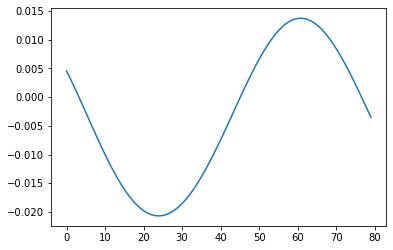

In [43]:
plt.plot(trajs[57,:80,0,0].real);

In [44]:
with open('tdci_heh+_AO_diagonalized_cycle_mean.npz', 'wb') as f:
    np.save(f, trajs)

In [20]:
trajs

array([[[[ 0.03027408,  0.03027408],
         [ 0.03027408, -0.03027407]],

        [[ 0.02887758,  0.02887758],
         [ 0.02887758, -0.02887757]],

        [[ 0.02729549,  0.02729548],
         [ 0.02729548, -0.02729548]],

        ...,

        [[-0.02554515, -0.02554514],
         [-0.02554514,  0.02554513]],

        [[-0.02663322, -0.02663321],
         [-0.02663321,  0.0266332 ]],

        [[-0.02749909, -0.02749908],
         [-0.02749908,  0.02749907]]],


       [[[ 0.14491365,  0.14491371],
         [ 0.14491371, -0.14491378]],

        [[ 0.15344298,  0.15344305],
         [ 0.15344305, -0.15344312]],

        [[ 0.16086524,  0.16086532],
         [ 0.16086532, -0.16086539]],

        ...,

        [[ 0.00595247,  0.00595247],
         [ 0.00595247, -0.00595246]],

        [[-0.00925914, -0.00925915],
         [-0.00925915,  0.00925916]],

        [[-0.02439484, -0.02439485],
         [-0.02439485,  0.02439487]]],


       [[[ 0.11821413,  0.11821411],
         [ 0.118214

In [45]:
traces = np.einsum('ijj ->i',rdmAO@overlap)
print(np.max(traces),np.min(traces))
traces

NameError: name 'rdmAO' is not defined

In [ ]:
# denAOtdhf = np.load('C:/Users/Hardeep/Downloads/td_dens_re+im_rt-tdexx_delta_s0_heh+_sto-3g.npz')

In [ ]:
# denAOtdhf = denAOtdhf['td_dens_re_data'] + 1j*denAOtdhf['td_dens_im_data']

In [ ]:
# denAOtdhf.shape

In [ ]:
# for i in range(trajs.shape[0]):
#     traj = trajs[i]
#     print(np.linalg.norm(traj - denAOtdhf[:20000]))

In [ ]:
# fig, axs = plt.subplots(2, 2, figsize=(10,8))
# for i in range(0,2):
#     for j in range(0,2):
#         axs[i,j].plot(trajs[3,:5000,i,j].real)
#         axs[i,j].plot(denAO[:5000,i,j].real)
#         axs[i,j].set_title('P'+str(i)+str(j)+' Real')

In [8]:
trajs[0,0,:,:]

NameError: name 'trajs' is not defined

In [9]:
denAOforcingtdhf = np.load('C:/Users/Hardeep/Downloads/td_dens_re+im_rt-tdexx_ndlaser1cycs0_heh+_sto-3g.npz')

In [10]:
denAOforcingtdhf = denAOforcingtdhf['td_dens_re_data'] + 1j*denAOforcingtdhf['td_dens_im_data']

In [11]:
denAOforcingtdhf.shape

(20002, 2, 2)

In [12]:
denAOforcingtdhf[0,:,:]

array([[0.0410154+0.j, 0.177468 +0.j],
       [0.177468 +0.j, 0.767882 +0.j]])

In [ ]:
# for i in range(trajs.shape[0]):
#     traj = trajs[i]
#     print(np.linalg.norm(traj - denAOforcingtdhf[:20000]))

In [ ]:
# fig, axs = plt.subplots(2, 2, figsize=(10,8))
# for i in range(0,2):
#     for j in range(0,2):
#         axs[i,j].plot(trajs[3,:5000,i,j].imag)
#         axs[i,j].plot(denAOforcing[:5000,i,j].imag)
#         axs[i,j].set_title('P'+str(i)+str(j)+' Imaginary')

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10,8))

axs[0,0].plot(trajs[3,:5000,0,0].real)
axs[0,0].plot(denAOforcingtdhf[:5000,0,0].real)
axs[0,0].set_title('P'+str(0)+str(0)+' Real')

axs[0,1].plot(trajs[3,:5000,0,1].real)
axs[0,1].plot(denAOforcingtdhf[:5000,0,1].real)
axs[0,1].set_title('P'+str(0)+str(1)+' Real')

axs[1,0].plot(trajs[3,:5000,0,1].imag)
axs[1,0].plot(denAOforcingtdhf[:5000,0,1].imag)
axs[1,0].set_title('P'+str(0)+str(1)+' Imaginary')

axs[1,1].plot(trajs[3,:5000,1,1].real)
axs[1,1].plot(denAOforcingtdhf[:5000,1,1].real)
axs[1,1].set_title('P'+str(1)+str(1)+' Real')




In [14]:
data = np.load('C:/Users/Hardeep/Downloads/td_efield+dipole_rt-tdexx_ndlaser1cycs0_heh+_sto-3g.npz')

In [15]:
list(data.keys())

['td_efield_data', 'td_dipole_data']

In [16]:
data = np.load('C:/Users/Hardeep/Downloads/ke+en+overlap+ee_twoe+dip_hf_ndlaser1cyc_s0_heh+_sto-3g.npz')
list(data.keys())

['ke_data',
 'en_data',
 'overlap_data',
 'ee_twoe_data',
 'dipx_data',
 'dipy_data',
 'dipz_data']

In [ ]:
dipole.shape

In [ ]:
plt.plot(dipole[2])

In [ ]:
dipole_moment_matrix_AO = np.array([[-0.729434, 0.0734846], [0.0734846, 0.729434]])

In [ ]:
denAOtdhf.shape,denAOforcingtdhf.shape ,trajs.shape

In [ ]:
tdcitraj = trajs[3]

In [ ]:
dmtdciAO = np.einsum('ijj -> i', (tdcitraj @ dipole_moment_matrix_AO))

In [ ]:
dmtdhfAOforcing = np.einsum('ijj -> i', (denAOforcingtdhf @ dipole_moment_matrix_AO))

In [ ]:
dmtdhfAO = np.einsum('ijj -> i', (denAOtdhf @ dipole_moment_matrix_AO))

In [ ]:
plt.plot(dmtdciAO.real[9000:10000]);
plt.plot(dmtdhfAOforcing.real[9000:10000]);
#plt.plot(dmtdhfAO.real[:10000]);
plt.legend(['TDCI', 'TDHF (forcing)', 'TDHF'])

In [ ]:
np.linalg.norm(dmtdciAO - dmtdhfAO[:20000])

In [ ]:
np.linalg.norm(dmtdciAO - dmtdhfAOforcing[:20000])

In [ ]:
np.linalg.norm(dmtdhfAOforcing - dmtdhfAO)

In [ ]:
plt.plot(dmtdhfAOforcing.real[:]);

In [79]:
trajs = []
steps = 10000
for i in range(1,10):
    data = np.load('./tdcasscf_data/td_dens_tdcasscf_heh+_sto-3g_00'+str(i)+'_dt=0.082680au.npz')
    traj = data['td_dens_re_data'] + 1j*data['td_dens_im_data']
    trajs.append(traj[:steps])


In [80]:
for i in range(10,100):
    data = np.load('./tdcasscf_data/td_dens_tdcasscf_heh+_sto-3g_0'+str(i)+'_dt=0.082680au.npz')
    traj = data['td_dens_re_data'] + 1j*data['td_dens_im_data']
    trajs.append(traj[:steps])

In [81]:
for i in range(100,302):
    data = np.load('./tdcasscf_data/td_dens_tdcasscf_heh+_sto-3g_'+str(i)+'_dt=0.082680au.npz')
    traj = data['td_dens_re_data'] + 1j*data['td_dens_im_data']
    trajs.append(traj[:steps])

In [82]:
trajs = np.array(trajs)
trajs.shape

(301, 10000, 2, 2)

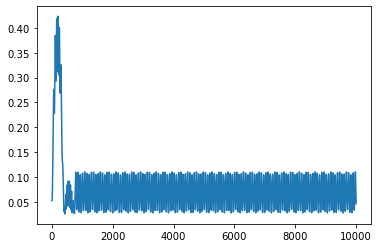

In [86]:
plt.plot(trajs[10,:,0,0].real)

In [87]:
(trajs[:,:,:,:].conj().T == trajs[:,:,:,:].conj().T).all()

True

In [88]:
with open('tdcasscf_forcing_full.npz', 'wb') as f:
    np.save(f, trajs)

In [35]:
trnfreq =[]
trnamp = []
trntme = []
trncycs = []
for i in range(1,10):
    data = np.load('./tdcasscf_data/tdcasscf_heh+_sto-3g_00'+str(i)+'_dt=0.082680au.npz')
    trnfreq.append(data['freq'].item())
    trnamp.append(data['emax'].item())
    period = (2*np.pi)/data['freq']
    period_tsteps = int(period/0.082680)
    duration = int(data['ncyc']*period_tsteps)
    tmeoff = duration
    trntme.append(tmeoff)
    trncycs.append(data['ncyc'])

In [36]:
for j in range(10,100):
    data = np.load('./tdcasscf_data/tdcasscf_heh+_sto-3g_0'+str(j)+'_dt=0.082680au.npz')
    trnfreq.append(data['freq'].item())
    trnamp.append(data['emax'].item())
    period = (2*np.pi)/data['freq']
    period_tsteps = int(period/0.082680)
    duration = int(data['ncyc']*period_tsteps)
    tmeoff = duration
    trntme.append(tmeoff)
    trncycs.append(data['ncyc'])

In [37]:
for j in range(100,302):
    data = np.load('./tdcasscf_data/tdcasscf_heh+_sto-3g_'+str(j)+'_dt=0.082680au.npz')
    trnfreq.append(data['freq'].item())
    trnamp.append(data['emax'].item())
    period = (2*np.pi)/data['freq']
    period_tsteps = int(period/0.082680)
    duration = int(data['ncyc']*period_tsteps)
    tmeoff = duration
    trntme.append(tmeoff)
    trncycs.append(data['ncyc'])

In [62]:
trnamp = np.array(trnamp)
trnfreq = np.array(trnfreq)
trntme = np.array(trntme)
trncycs = np.array(trncycs)

In [75]:
indsamp = np.where( (trnamp == 0.05) | (trnamp == -0.05))[0]
indsfreq = np.where((trnfreq == 0.9000000000000001) | (trnfreq == 1.1000000000000003))[0]
indscyc = np.where(trncycs == 5)[0]

In [76]:
indsamp.shape, indsfreq.shape, indscyc.shape

((100,), (60,), (60,))

In [78]:
set(indsamp) & set(indscyc)

{9,
 24,
 39,
 54,
 69,
 84,
 99,
 114,
 129,
 144,
 159,
 174,
 189,
 204,
 219,
 234,
 249,
 264,
 279,
 294}

In [89]:
with open('tdcasscf_trnamp.npz', 'wb') as f:
    np.save(f, trnamp)
    f.close()

In [90]:
with open('tdcasscf_trnfreq.npz', 'wb') as f:
    np.save(f, trnfreq)
    f.close()

In [91]:
with open('tdcasscf_trntme.npz', 'wb') as f:
    np.save(f, trntme)
    f.close()